## Mobile_Price_Prediction

### Importing Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
df = pd.read_csv('mobile_price_data.csv')
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [3]:
#For future reference we create a ref df
ref_df = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
mobile_name      459 non-null object
mobile_price     459 non-null object
mobile_color     459 non-null object
dual_sim         459 non-null object
disp_size        459 non-null object
resolution       459 non-null object
os               459 non-null object
num_cores        459 non-null object
mp_speed         459 non-null object
int_memory       459 non-null object
ram              459 non-null object
p_cam            459 non-null object
f_cam            459 non-null object
network          459 non-null object
bluetooth        459 non-null object
battery_power    459 non-null object
mob_width        459 non-null object
mob_height       459 non-null object
mob_depth        459 non-null object
mob_weight       459 non-null object
dtypes: object(20)
memory usage: 71.8+ KB


##### Note:- we can see every column is object type we should convert everyting to numerical data type to perform data visualization or to use regression models

### Data Wrangling

#####  1) we know mobile company name might have impact on cost so we will filter out only name from first column and later drop first column

In [5]:
df['mobile_name'] = df['mobile_name'].apply(lambda x : x.split()[0])
df['mobile_name']

0      Realme
1      Realme
2      Realme
3      Realme
4      Realme
        ...  
454      OPPO
455      OPPO
456      OPPO
457      OPPO
458      OPPO
Name: mobile_name, Length: 459, dtype: object

In [6]:
df['mobile_name'].value_counts()

Vivo       96
Redmi      93
OPPO       86
Realme     79
Infinix    36
POCO       31
Mi         20
Samsung    17
MI3         1
Name: mobile_name, dtype: int64

In [7]:
df['mobile_name'] = df['mobile_name'].replace('MI3','Mi')
df['mobile_name'].value_counts()

Vivo       96
Redmi      93
OPPO       86
Realme     79
Infinix    36
POCO       31
Mi         21
Samsung    17
Name: mobile_name, dtype: int64

##### 2) Mobile_price

In [8]:
x = df['mobile_price'][100]
x

'₹51,800'

In [9]:
def func1(x):
    val =''
    for i in x:
        if i.isdigit():
            val +=i
    val = int(val)
    return val

In [10]:
df['mobile_price'] = df['mobile_price'].apply(func1)
df['mobile_price'].unique()

array([ 8999,  9999, 11999, 14999, 16999, 13999, 35999, 31999, 15490,
       41999, 46999, 19999,  6999,  7499, 17999, 10999, 29999, 36999,
       20999,  6499, 25999, 24999, 27999, 32999,  8499,  9499, 10499,
        9799, 16939, 17350, 21999, 13495, 15990, 55799, 51800, 16899,
       12999, 16998,  7399, 11199, 13261, 10978, 11280, 10100,  7450,
       55400,  6700,  6699,  7999,  8369,  8090,  8498,  9990, 11349,
       14800, 13990,  8689, 11599,  9900, 10990, 10849, 16990, 18990,
       12990, 19990,  8990, 11982, 17990,  8705,  8949, 16375, 31990,
       27990, 24990, 11990,  9199, 22399, 21099, 29499, 11490, 28499,
       28990, 29990, 15500, 14990, 18900, 24000,  8900, 11500, 10900,
       12000, 22325, 13995, 13529,  8998, 14914, 14538, 17490, 16499,
       18499, 15999,  6299, 19900, 47999,  6000, 20995, 11995, 10995,
       11499,  7699,  7599,  9599, 18999, 22999, 21499, 17499, 12490,
       15899, 41990, 38990, 60990, 14499, 13744,  9490, 18989, 19038,
        8490, 19600,

##### 3) disp size

In [11]:
df['disp_size'].unique()

array(['16.56 cm (6.52 inch)', '16.51 cm (6.5 inch)',
       '16.0 cm (6.3 inch)', '16.26 cm (6.4 inch)',
       '16.36 cm (6.44 inch)', '16.76 cm (6.6 inch)',
       '15.49 cm (6.1 inch)', '16.69 cm (6.57 inch)',
       '15.8 cm (6.22 inch)', '16.23 cm (6.39 inch)',
       '16.94 cm (6.67 inch)', '15.44 cm (6.08 inch)',
       '15.21 cm (5.99 inch)', '15.9 cm (6.26 inch)', '12.7 cm (5 inch)',
       '15.46 cm (6.088 inch)', '13.97 cm (5.5 inch)',
       '13.84 cm (5.45 inch)', '16.13 cm (6.35 inch)',
       '16.21 cm (6.38 inch)', '16.59 cm (6.53 inch)',
       '16.28 cm (6.41 inch)', '16.74 cm (6.59 inch)',
       '14.48 cm (5.7 inch)', '15.24 cm (6 inch)', '13.21 cm (5.2 inch)',
       '17.02 cm (6.7 inch)', '11.94 cm (4.7 inch)',
       '15.06 cm (5.93 inch)', '15.75 cm (6.2 inch)',
       '15.72 cm (6.19 inch)', '14.35 cm (5.65 inch)',
       '15.19 cm (5.98 inch)', '15.77 cm (6.21 inch)',
       '15.7 cm (6.18 inch)', '15.82 cm (6.23 inch)'], dtype=object)

In [12]:
x = df['disp_size'][0]
x

'16.56 cm (6.52 inch)'

In [13]:
def func2(x):
    x = x.split()[0]
    x = float(x)
    return x

In [14]:
df['disp_size(cm)'] = df['disp_size'].apply(func2)
df.drop('disp_size',axis = 1,inplace = True)
df['disp_size(cm)'].unique()

array([16.56, 16.51, 16.  , 16.26, 16.36, 16.76, 15.49, 16.69, 15.8 ,
       16.23, 16.94, 15.44, 15.21, 15.9 , 12.7 , 15.46, 13.97, 13.84,
       16.13, 16.21, 16.59, 16.28, 16.74, 14.48, 15.24, 13.21, 17.02,
       11.94, 15.06, 15.75, 15.72, 14.35, 15.19, 15.77, 15.7 , 15.82])

In [15]:
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size(cm)
0,Realme,8999,So White,Dual Sim,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g,16.56
1,Realme,8999,So Blue,Dual Sim,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g,16.56
2,Realme,9999,So Blue,Dual Sim,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g,16.56
3,Realme,9999,So White,Dual Sim,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g,16.56
4,Realme,11999,That Green,Dual Sim,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g,16.51


##### 3) mp_speeed, int memory and  ram

In [16]:
x = df['ram'][0]
print(int(x.split()[0]))
x = df['int_memory'][0]
print(int(x.split()[0]))
x = df['mp_speed'][0]
print(float(x.split()[0]))

3
32
2.0


In [17]:
print(df['mp_speed'].unique(),'\n')
df['mp_speed'] = df['mp_speed'].apply(lambda x: float(x.split()[0]))
print(df['mp_speed'].unique())

['2 GHz' '2.3 GHz' '2.96 GHz' '1.95 GHz' '2.8 GHz' '2.05 GHz' '2.2 GHz'
 '2.1 GHz' '2.84 GHz' '2.5 GHz' '1.8 GHz' '1.4 GHz' '1.5 GHz' '1.3 GHz'
 '1.6 GHz' '2.39 GHz' '2.6 GHz' '2.649 GHz'] 

[2.    2.3   2.96  1.95  2.8   2.05  2.2   2.1   2.84  2.5   1.8   1.4
 1.5   1.3   1.6   2.39  2.6   2.649]


In [18]:
print(df['int_memory'].unique(),'\n')
df['int_memory'] = df['int_memory'].apply(lambda x: int(x.split()[0]))
print(df['int_memory'].unique())

['32 GB' '64 GB' '128 GB' '256 GB' '16 GB' '512 GB' '8 GB'] 

[ 32  64 128 256  16 512   8]


In [19]:
print(df['ram'].unique(),'\n')
df['ram'] = df['ram'].apply(lambda x: int(x.split()[0]))
print(df['ram'].unique())

['3 GB' '4 GB' '6 GB' '8 GB' '12 GB' '2 GB' '1 GB'] 

[ 3  4  6  8 12  2  1]


##### 4) mobile width height depth weight

In [20]:
print(df['mob_width'].unique(),'\n')
print(df['mob_height'].unique(),'\n')
print(df['mob_depth'].unique(),'\n')
print(df['mob_weight'].unique(),'\n')

['75 mm' '75.4 mm' '74.2 mm' '75.7 mm' '74 mm' '75.16 mm' '74.24 mm'
 '74.8 mm' '75.8 mm' '73.7 mm' '75.6 mm' '75.2 mm' '75.41 mm' '74.3 mm'
 '76.68 mm' '71.85 mm' '75.21 mm' '75.49 mm' '77.26 mm' '76.4 mm'
 '75.35 mm' '73.6 mm' '9 mm' '8.35 mm' '76 mm' '70.1 mm' '70.4 mm'
 '71.5 mm' '75.58 mm' '76.2 mm' '76.77 mm' '75.23 mm' '75.19 mm'
 '75.09 mm' '76.46 mm' '77.33 mm' '76.47 mm' '75.04 mm' '74.17 mm'
 '74.71 mm' '74.7 mm' '75.08 mm' '77 mm' '75.03 mm' '75.93 mm' '72.8 mm'
 '75.24 mm' '75.74 mm' '72.9 mm' '159 mm' '75.3 mm' '72.1 mm' '69 mm'
 '152.4 mm' '76.8 mm' '76.88 mm' '75.25 mm' '72.85 mm' '82.38 mm'
 '76.6 mm' '75.5 mm' '73.3 mm' '73.4 mm' '76.1 mm' '77.2 mm' '73.1 mm'
 '77.35 mm' '74.6 mm' '154.5 mm' '73.8 mm'] 

['164.4 mm' '157 mm' '161 mm' '156.7 mm' '158.7 mm' '158.96 mm' '162.1 mm'
 '163.9 mm' '154.3 mm' '163.8 mm' '156.1 mm' '156.48 mm' '165.75 mm'
 '153.48 mm' '159.21 mm' '151.86 mm' '160.73 mm' '157.9 mm' '162.58 mm'
 '158.58 mm' '144 mm' '175 mm' '158.3 mm' '151 mm' '

In [21]:
print(df['mob_width'].nunique(),'\n')
print(df['mob_height'].nunique(),'\n')
print(df['mob_depth'].nunique(),'\n')
print(df['mob_weight'].nunique(),'\n')

70 

81 

55 

62 



In [22]:
df['mob_width'] = df['mob_width'].str.replace('\smm','', regex = True)
df['mob_height'] = df['mob_height'].str.replace('\smm','', regex = True)
df['mob_depth'] = df['mob_depth'].str.replace('\smm','', regex = True)
df['mob_weight'] = df['mob_weight'].str.replace('\sg','', regex = True)

In [23]:
print(df['mob_width'].unique(),'\n')
print(df['mob_height'].unique(),'\n')
print(df['mob_depth'].unique(),'\n')
print(df['mob_weight'].unique(),'\n')

['75' '75.4' '74.2' '75.7' '74' '75.16' '74.24' '74.8' '75.8' '73.7'
 '75.6' '75.2' '75.41' '74.3' '76.68' '71.85' '75.21' '75.49' '77.26'
 '76.4' '75.35' '73.6' '9' '8.35' '76' '70.1' '70.4' '71.5' '75.58' '76.2'
 '76.77' '75.23' '75.19' '75.09' '76.46' '77.33' '76.47' '75.04' '74.17'
 '74.71' '74.7' '75.08' '77' '75.03' '75.93' '72.8' '75.24' '75.74' '72.9'
 '159' '75.3' '72.1' '69' '152.4' '76.8' '76.88' '75.25' '72.85' '82.38'
 '76.6' '75.5' '73.3' '73.4' '76.1' '77.2' '73.1' '77.35' '74.6' '154.5'
 '73.8'] 

['164.4' '157' '161' '156.7' '158.7' '158.96' '162.1' '163.9' '154.3'
 '163.8' '156.1' '156.48' '165.75' '153.48' '159.21' '151.86' '160.73'
 '157.9' '162.58' '158.58' '144' '175' '158.3' '151' '165.5' '140.4'
 '146.3' '147.5' '158.73' '153' '159.43' '159.53' '159.25' '155.11'
 '162.04' '162.39' '162.15' '159.64' '159.01' '157.25' '159' '157.91'
 '162' '155.06' '154.81' '161.97' '149.3' '155.21' '155.87' '149.9'
 '154.6' '9' '163.6' '143.4' '162.5' '136.5' '152.4' '78.6' '165'

In [24]:
print(df['mob_width'].nunique(),'\n')
print(df['mob_height'].nunique(),'\n')
print(df['mob_depth'].nunique(),'\n')
print(df['mob_weight'].nunique(),'\n')

70 

81 

55 

62 



##### 5) bluetooth battery_power, dualsim

In [25]:
print(df['bluetooth'].value_counts())
print(df['dual_sim'].value_counts())

Yes    459
Name: bluetooth, dtype: int64
Dual Sim      458
Single Sim      1
Name: dual_sim, dtype: int64


In [26]:
df.drop(['bluetooth','dual_sim'],axis = 1, inplace = True)

In [27]:
print(df['battery_power'].nunique())
df['battery_power'].unique()

34


array(['5000 mAh', '4035 mAh', '4000 mAh', '3500 mAh', '4200 mAh',
       '4300 mAh', '4230 mAh', '5020 mAh', '4030 mAh', '3400 mAh',
       '3080 mAh', '3010 mAh', '4780 mAh', '3050 mAh', '4100 mAh',
       '3000 mAh', '4500 mAh', '3700 mAh', '3260 mAh', '3360 mAh',
       '3225 mAh', '2730 mAh', '6000 mAh', '2600 mAh', '2000 mAh',
       '3600 mAh', '4350 mAh', '4025 mAh', '4065 mAh', '3730 mAh',
       '3180 mAh', '4020 mAh', '3075 mAh', '3200 mAh'], dtype=object)

In [28]:
df['battery_power'] = df['battery_power'].str.replace('\smAh','',regex = True)
print(df['battery_power'].nunique())
df['battery_power'].unique()

34


array(['5000', '4035', '4000', '3500', '4200', '4300', '4230', '5020',
       '4030', '3400', '3080', '3010', '4780', '3050', '4100', '3000',
       '4500', '3700', '3260', '3360', '3225', '2730', '6000', '2600',
       '2000', '3600', '4350', '4025', '4065', '3730', '3180', '4020',
       '3075', '3200'], dtype=object)

##### 6) mobile_color,resolution,os

In [29]:
print(df['mobile_color'].unique())

['So White' 'So Blue' 'That Green' 'That White' 'Crystal Green'
 'Sparkling Blue' 'Lunar White' 'Neptune Blue' 'Black Sea' 'Pearl Blue'
 'Pearl White' 'Rust Red' 'Moss Green' 'Frozen Blue' 'Comet White'
 'Lightning Orange' 'Lightning Blue' 'Diamond Black' 'Diamond Blue'
 'Diamond Ruby' 'Comet Blue' 'Diamond Sapphire' 'Crystal Red'
 'Crystal Blue' 'Crystal Purple' 'Red Brick' 'Concrete' 'Pearl Green'
 'That Blue' 'Glacier Blue' 'Arctic White' 'Dynamic Black' 'Diamond Red'
 'Radiant Blue' 'Black' 'Sapphire Blue' 'Onyx Black' 'Flame Red'
 'Aurora Blue' 'Carbon Black' 'More Than White' 'Space Black'
 'Not just Blue' 'Kind of Grey' 'Nebula Red' 'Gold' 'Rose Gold' 'Red'
 'Twilight Grey' 'Coral Green' 'Lake Blue' 'Metallic Grey' 'Emerald Green'
 'Ruby Red' 'Interstellar Black' 'Sea Blue' 'Midnight Grey'
 'Moonlight White' 'Sky White' 'Glacier White' 'Astro Moonlight White'
 'Sunset Red' 'Blue/Lake Blue' 'Blue' 'Matte Black' 'Matte Gold'
 'Elegant Blue' 'Prime Black' 'Grey' 'Dark Grey' 'Burgun

In [30]:
df[['dumm1','dummy2','mobile_color']] = df['mobile_color'].str.rpartition(' ')
df[['dumm1','dummy2','mobile_color']] 

,dumm1,dummy2,mobile_color
0,So,,White
1,So,,Blue
2,So,,Blue
3,So,,White
4,That,,Green
...,...,...,...
454,,,Black
455,,,Red
456,,,Red
457,Marble,,Green


In [31]:
df.drop(['dumm1','dummy2',],axis = 1,inplace = True)

In [32]:
df['mobile_color'].value_counts()

Blue         119
Black        115
Red           53
White         40
Gold          34
Purple        24
Green         21
Grey          14
Violet         5
Gray           4
Silver         3
Greener        3
Mint           3
Sapphire       2
Concrete       2
Mist           2
Wave           2
Brick          2
Cyan           2
Edition        2
Ruby           1
white          1
Sea            1
Orange         1
gold           1
Champagne      1
Brown          1
Name: mobile_color, dtype: int64

In [33]:
df['mobile_color'] = df['mobile_color'].replace({'Greener':'Green','white':'White','gold':'Gold','Gray':'Grey'})

In [34]:
df['mobile_color'].value_counts()

Blue         119
Black        115
Red           53
White         41
Gold          35
Purple        24
Green         24
Grey          18
Violet         5
Silver         3
Mint           3
Sapphire       2
Mist           2
Concrete       2
Wave           2
Brick          2
Cyan           2
Edition        2
Ruby           1
Sea            1
Champagne      1
Orange         1
Brown          1
Name: mobile_color, dtype: int64

In [35]:
df['resolution'].unique()

array(['1600 x 720 Pixels', '2340 x 1080 pixels', '2400 x 1080 Pixels',
       '1080 x 2340 Pixels', '1080 x 2400 Pixels', '720 x 1600 Pixels',
       '1560 x 720 pixels', '2400 × 1080 Pixels', '1520 x 720 pixels',
       '1520 x 720 Pixels', '2400 x 1080 pixel', '1560 x 720 Pixels',
       '2160 x 1080 Pixels', '1440 x 720 pixels', '2280 x 1080 pixels',
       '2160 x 1080 pixels', '2340 x 1080 Pixel', '1920 x 1080 Pixels',
       '1520 x 720$$Pixels', '1520 x 720$$pixel', '2280 x 1080$$Pixels',
       '1920 x 1080 pixels', '2400 x 1080 Pixel', '1280 x 720 pixels',
       '2400 x 1080$$pixel', '1280 x 720 Pixels', '720 x 1544 pixels',
       '720 x 1544 Pixels', '2340 x 1080 Pixels', '2316 x 1080 pixels',
       '2280 x 1080 Pixels', '1440 x 720 Pixels', '1440 x 720 Pixel',
       '1520 x 720$$ pixels', '1520 x 720$pixels', '2340 x 1080$$pixel',
       '2340 x 1080$$Pixel', '960 x 540 Pixels', '540 x 960 Pixels',
       '1080 x 2160 pixels', '1500 x 720 pixels', '720 x 1440 Pixels',
 

In [36]:
df['resolution'] = df['resolution'].replace('\s?[pP]ixel.*','',regex =True).replace('\s?[X*x]\s?','X',regex = True).replace(
    '\$','',regex = True)

In [37]:
df['resolution'].unique()

array(['1600X720', '2340X1080', '2400X1080', '1080X2340', '1080X2400',
       '720X1600', '1560X720', '2400 × 1080', '1520X720', '2160X1080',
       '1440X720', '2280X1080', '1920X1080', '1280X720', '720X1544',
       '2316X1080', '960X540', '540X960', '1080X2160', '1500X720',
       '720X1440', '1080X1920', '720X1520', '720X1560', '720X1280'],
      dtype=object)

In [38]:
df['resolution'] = df['resolution'].replace('2400 × 1080','2400X1080')

In [39]:
df['resolution'].unique()

array(['1600X720', '2340X1080', '2400X1080', '1080X2340', '1080X2400',
       '720X1600', '1560X720', '1520X720', '2160X1080', '1440X720',
       '2280X1080', '1920X1080', '1280X720', '720X1544', '2316X1080',
       '960X540', '540X960', '1080X2160', '1500X720', '720X1440',
       '1080X1920', '720X1520', '720X1560', '720X1280'], dtype=object)

In [40]:
df[['res1','X','res2']] = df['resolution'].str.partition('X')
df[['res1','X','res2']]

,res1,X,res2
0,1600,X,720
1,1600,X,720
2,1600,X,720
3,1600,X,720
4,1600,X,720
...,...,...,...
454,1440,X,720
455,1440,X,720
456,2280,X,1080
457,1080,X,2340


In [41]:
df.drop('X',axis =1, inplace = True)

In [42]:
print(df['res1'].unique())
print(df['res2'].unique())

['1600' '2340' '2400' '1080' '720' '1560' '1520' '2160' '1440' '2280'
 '1920' '1280' '2316' '960' '540' '1500']
['720' '1080' '2340' '2400' '1600' '1544' '540' '960' '2160' '1440' '1920'
 '1520' '1560' '1280']


In [43]:
df['res1'] = df['res1'].astype(int)
df['res2'] = df['res2'].astype(int)

In [44]:
df['resolution'] = df['res1']*df['res2']
df['resolution'].unique()

array([1152000, 2527200, 2592000, 1123200, 1094400, 2332800, 1036800,
       2462400, 2073600,  921600, 1111680, 2501280,  518400, 1080000],
      dtype=int64)

In [45]:
df.drop(['res1','res2'],axis = 1,inplace = True)

In [46]:
df['os'].unique()

array(['Android 10', 'Android Pie 9.0', 'Android Pie 9',
       'Android Oreo 8.1', 'Android Pie 10', 'Android Nougat 7.1.1',
       'Android Oreo 8.0', 'Android Nougat 7.1.2', 'Android KitKat 4.4.2',
       'Android Marshmallow 6.0.1', 'Android Nougat 7.1',
       'Android Marshmallow 6', 'Android Nougat 7',
       'Android Lollipop 5.4.1', 'Android Oreo 8.1.0', 'Android Oreo 8',
       'Android Lollipop 5.1', 'Android Lollipop 5.1.1'], dtype=object)

In [47]:
df['os'] = df['os'].str.replace(r'^Android\s[a-zA-Z]*\s?',r'',regex = True)

In [48]:
df['os'].unique()

array(['10', '9.0', '9', '8.1', '7.1.1', '8.0', '7.1.2', '4.4.2', '6.0.1',
       '7.1', '6', '7', '5.4.1', '8.1.0', '8', '5.1', '5.1.1'],
      dtype=object)

In [49]:
df[['os','dummy1','dummy2']] = df['os'].str.partition('.')
df[['os','dummy1','dummy2']]

,os,dummy1,dummy2
0,10,,
1,10,,
2,10,,
3,10,,
4,10,,
...,...,...,...
454,7,.,1
455,7,.,1
456,8,.,1.0
457,9,.,0


In [50]:
df.drop(['dummy1','dummy2'],axis = 1,inplace = True)

In [51]:
df['os'].value_counts()

9     208
8     122
10     84
7      34
5       5
6       5
4       1
Name: os, dtype: int64

##### 8) P_cam,f_cam,network,num_cores

In [52]:
df['p_cam'].unique()

array(['12MP + 2MP + 2MP', '48MP + 8MP + 2MP + 2MP',
       '48MP + 8MP + 2MP + 2MP Quad Camera', '64MP + 13MP + 8MP + 2MP',
       '16MP + 2MP', '64MP + 8MP + 2MP + 2MP Quad Camera',
       '64MP + 12MP + 8MP + 2MP', '12MP + 2MP', '64MP + 8MP + 2MP + 2MP',
       '13MP + 2MP', '64MP + 8MP + 8MP + 2MP', '48MP + 13MP + 8MP',
       '48MP + 8MP + 5MP + 2MP', '48MP + 8MP + 2MP', '48MP + 5MP',
       '12MP Rear Camera', '12MP + 5MP', '20MP + 12MP',
       '108MP Rear Camera', '13MP Rear Camera', '48MP + 8MP',
       '64MP + 8MP + 5MP + 2MP', '8MP Rear Camera', '13MP + 2MP + 8MP',
       '13MP + 8MP + 2MP', '13MP + 8MP + 2MP + 2MP', '16MP + 2MP + 8MP',
       '16MP + 8MP + 2MP', '48MP + 5MP + 8MP',
       '48 Million Quad Pixel Sensor (12 Million Effective Pixel) + 8MP + 5MP, AI Triple Rear Camera',
       '48MP + 13MP + 8MP + 2MP', '12MP + 5MP + 8MP', '16MP Rear Camera',
       '16MP + 5MP', '48MP + 8MP + 5MP', '64MP + 8MP + 5MP + 5MP',
       '48MP + 12MP + 5MP', '5MP Rear Camera',
      

In [53]:
df['p_cam_max'] = [x[0:2].replace('M','') for x in df['p_cam']]
df['p_cam_count'] = [x.count('MP') for x in df['p_cam']]

In [54]:
df['f_cam_max'] = [x[0:2].replace('M','') for x in df['p_cam']]
df['f_cam_count'] = [x.count('MP') for x in df['p_cam']]

In [55]:
df.drop(['p_cam','f_cam'],axis = 1, inplace = True)

In [56]:
df['network'].unique()

array(['4G VOLTE, 4G, 3G, 2G', '3G, 4G VOLTE, 2G', '3G, 4G VOLTE, 4G, 2G',
       '3G, 4G, 2G', '4G, 2G, 3G', '5G, 4G VOLTE, 4G, 3G, 2G',
       '4G VOLTE, 3G, 2G', '4G VOLTE, 3G', '4G VOLTE, 4G, 2G, 3G',
       '4G VOLTE, 5G', '3G, 4G VOLTE, 4G', '3G', '4G VOLTE',
       '3G, 4G VOLTE', '2G', '4G, 3G, 2G', '3G, 4G', '4G VOLTE, 4G'],
      dtype=object)

In [57]:
df['network'] = df['network'].str.replace(' ','')

In [58]:
df['network'].unique()

array(['4GVOLTE,4G,3G,2G', '3G,4GVOLTE,2G', '3G,4GVOLTE,4G,2G',
       '3G,4G,2G', '4G,2G,3G', '5G,4GVOLTE,4G,3G,2G', '4GVOLTE,3G,2G',
       '4GVOLTE,3G', '4GVOLTE,4G,2G,3G', '4GVOLTE,5G', '3G,4GVOLTE,4G',
       '3G', '4GVOLTE', '3G,4GVOLTE', '2G', '4G,3G,2G', '3G,4G',
       '4GVOLTE,4G'], dtype=object)

In [59]:
sorted(df['network'][0].split(','))

['2G', '3G', '4G', '4GVOLTE']

In [60]:
df['network'] = df['network'].apply(lambda x: sorted(x.split(',')))
# df['network'].unique()

In [61]:
df['network'].value_counts()

[2G, 3G, 4G, 4GVOLTE]        238
[2G, 3G, 4GVOLTE]             99
[2G, 3G, 4G]                  68
[3G, 4GVOLTE]                 18
[3G, 4G, 4GVOLTE]             13
[4GVOLTE]                      8
[4GVOLTE, 5G]                  4
[2G, 3G, 4G, 4GVOLTE, 5G]      3
[4G, 4GVOLTE]                  3
[2G]                           2
[3G, 4G]                       2
[3G]                           1
Name: network, dtype: int64

In [62]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb=MultiLabelBinarizer()
dg=pd.DataFrame(mlb.fit_transform(df['network']),columns=mlb.classes_,index=df.index)

In [63]:
dg.head()

,2G,3G,4G,4GVOLTE,5G
0,1,1,1,1,0
1,1,1,1,1,0
2,1,1,1,1,0
3,1,1,1,1,0
4,1,1,1,1,0


In [64]:
df=pd.merge(df,dg,left_index=True,right_index=True)

In [65]:
df.drop('network',axis = 1,inplace = True)

In [66]:
df['num_cores'].unique()

array(['Octa Core', 'Quad Core', 'Single Core'], dtype=object)

In [67]:
df['num_cores'] = df['num_cores'].map({'Octa Core':8,'Quad Core':4,'Single Core':1})
df['num_cores'].unique()

array([8, 4, 1], dtype=int64)

In [68]:
my_int_col = ['os','battery_power','p_cam_max','f_cam_max',]
my_float_col= ['mob_width','mob_height','mob_depth','mob_weight']
df[my_int_col] = df[my_int_col].astype(int)
df[my_float_col] = df[my_float_col].astype(float)

In [69]:
df.head()

,mobile_name,mobile_price,mobile_color,resolution,os,num_cores,mp_speed,int_memory,ram,battery_power,...,disp_size(cm),p_cam_max,p_cam_count,f_cam_max,f_cam_count,2G,3G,4G,4GVOLTE,5G
0,Realme,8999,White,1152000,10,8,2.0,32,3,5000,...,16.56,12,3,12,3,1,1,1,1,0
1,Realme,8999,Blue,1152000,10,8,2.0,32,3,5000,...,16.56,12,3,12,3,1,1,1,1,0
2,Realme,9999,Blue,1152000,10,8,2.0,64,4,5000,...,16.56,12,3,12,3,1,1,1,1,0
3,Realme,9999,White,1152000,10,8,2.0,64,4,5000,...,16.56,12,3,12,3,1,1,1,1,0
4,Realme,11999,Green,1152000,10,8,2.0,128,4,5000,...,16.51,48,4,48,4,1,1,1,1,0


### Data Visulaization

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 24 columns):
mobile_name      459 non-null object
mobile_price     459 non-null int64
mobile_color     459 non-null object
resolution       459 non-null int32
os               459 non-null int32
num_cores        459 non-null int64
mp_speed         459 non-null float64
int_memory       459 non-null int64
ram              459 non-null int64
battery_power    459 non-null int32
mob_width        459 non-null float64
mob_height       459 non-null float64
mob_depth        459 non-null float64
mob_weight       459 non-null float64
disp_size(cm)    459 non-null float64
p_cam_max        459 non-null int32
p_cam_count      459 non-null int64
f_cam_max        459 non-null int32
f_cam_count      459 non-null int64
2G               459 non-null int32
3G               459 non-null int32
4G               459 non-null int32
4GVOLTE          459 non-null int32
5G               459 non-null int32
dtypes: float64(6

In [71]:
df.describe()

,mobile_price,resolution,os,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,...,disp_size(cm),p_cam_max,p_cam_count,f_cam_max,f_cam_count,2G,3G,4G,4GVOLTE,5G
count,459.000000,4.590000e+02,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,...,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,16643.448802,1.867733e+06,8.681917,7.862745,2.118296,87.093682,4.877996,4161.383442,74.228170,157.731874,...,15.907647,28.978214,2.533769,28.978214,2.533769,0.893246,0.962963,0.712418,0.840959,0.015251
std,8701.098364,7.096156e+05,0.986326,0.759730,0.350997,64.919281,2.082977,615.902516,13.106075,12.219824,...,0.815102,19.959007,1.055477,19.959007,1.055477,0.309137,0.189059,0.453129,0.366114,0.122682
min,6000.000000,5.184000e+05,4.000000,1.000000,1.300000,8.000000,1.000000,2000.000000,8.350000,7.380000,...,11.940000,5.000000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10999.000000,1.094400e+06,8.000000,8.000000,2.000000,32.000000,4.000000,4000.000000,75.000000,155.900000,...,15.700000,13.000000,2.000000,13.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,14495.000000,2.332800e+06,9.000000,8.000000,2.000000,64.000000,4.000000,4030.000000,75.350000,158.700000,...,16.000000,16.000000,2.000000,16.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,18990.000000,2.527200e+06,9.000000,8.000000,2.300000,128.000000,6.000000,4500.000000,75.800000,162.000000,...,16.510000,48.000000,4.000000,48.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,60990.000000,2.592000e+06,10.000000,8.000000,2.960000,512.000000,12.000000,6000.000000,159.000000,175.000000,...,17.020000,64.000000,4.000000,64.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### top  10 variables correlation with mobile_price visiualizing with heatmap

(10.0, 0.0)

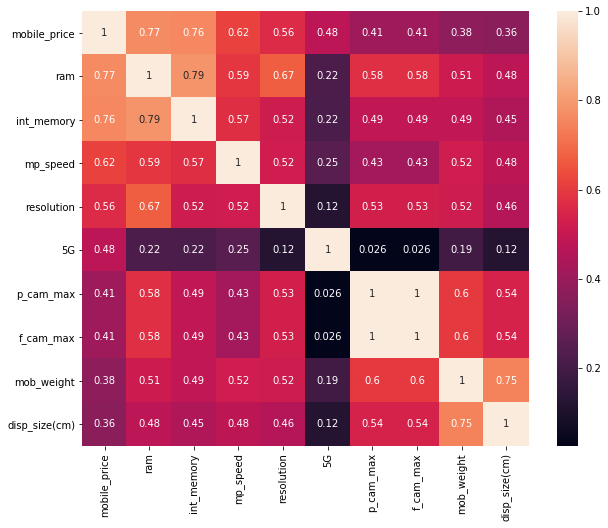

In [72]:
my_corr_list = df.corr().nlargest(10,'mobile_price').index.tolist()
x =df[my_corr_list].corr()
plt.figure(figsize = (10,8))
axes = sns.heatmap(x,annot = True)
b,t = axes.get_ylim()
axes.set_ylim(b+0.5,t-0.5)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 24 columns):
mobile_name      459 non-null object
mobile_price     459 non-null int64
mobile_color     459 non-null object
resolution       459 non-null int32
os               459 non-null int32
num_cores        459 non-null int64
mp_speed         459 non-null float64
int_memory       459 non-null int64
ram              459 non-null int64
battery_power    459 non-null int32
mob_width        459 non-null float64
mob_height       459 non-null float64
mob_depth        459 non-null float64
mob_weight       459 non-null float64
disp_size(cm)    459 non-null float64
p_cam_max        459 non-null int32
p_cam_count      459 non-null int64
f_cam_max        459 non-null int32
f_cam_count      459 non-null int64
2G               459 non-null int32
3G               459 non-null int32
4G               459 non-null int32
4GVOLTE          459 non-null int32
5G               459 non-null int32
dtypes: float64(6

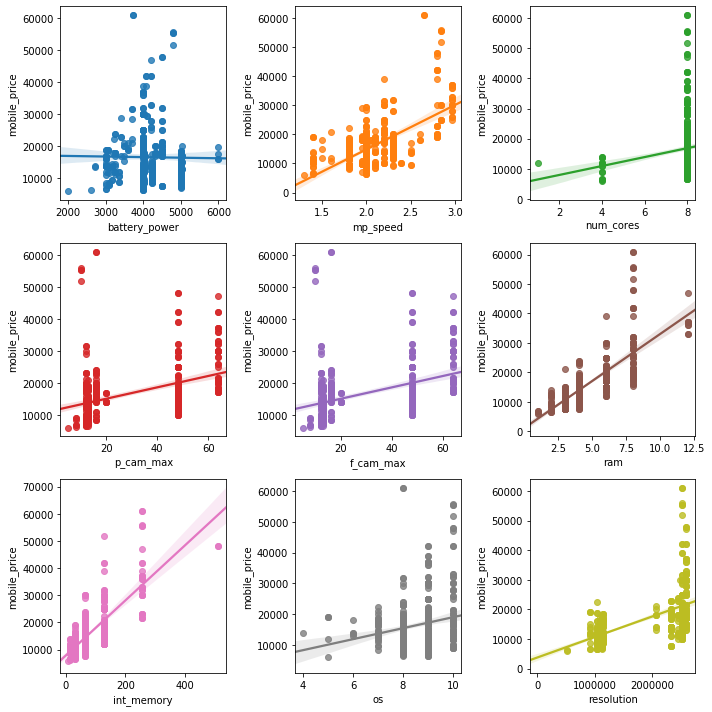

In [74]:
my_col = ['battery_power','mp_speed','num_cores','p_cam_max','f_cam_max','ram','int_memory','os','resolution']
fig,axes = plt.subplots(3,3,figsize = (10,10))
for i in range(9):
    if i<3:
        sns.regplot(x = my_col[i],y = 'mobile_price',data = df,ax = axes[0,i])
    elif 3<=i<6:
        sns.regplot(x = my_col[i],y = 'mobile_price',data = df,ax = axes[1,i-3])
    else:
        sns.regplot(x = my_col[i],y = 'mobile_price',data = df,ax = axes[2,i-6])
plt.tight_layout()

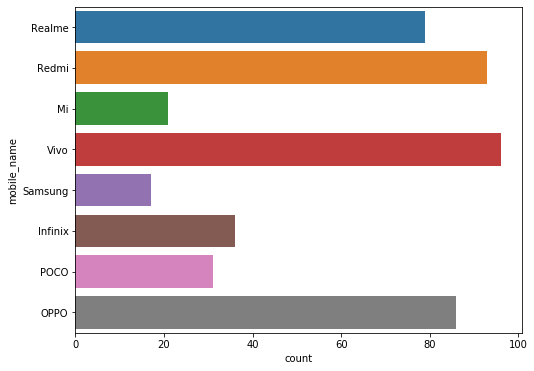

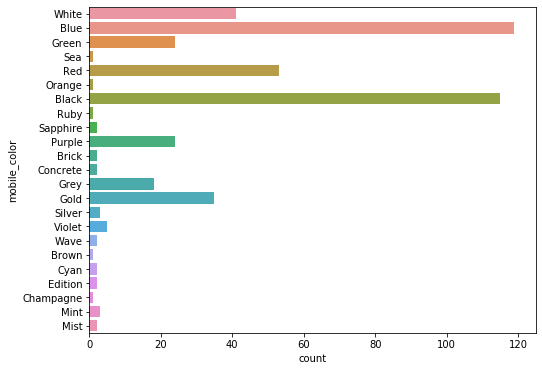

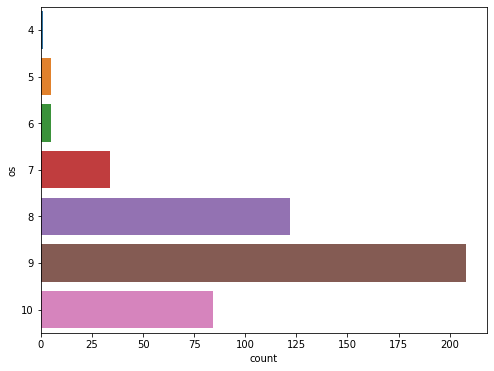

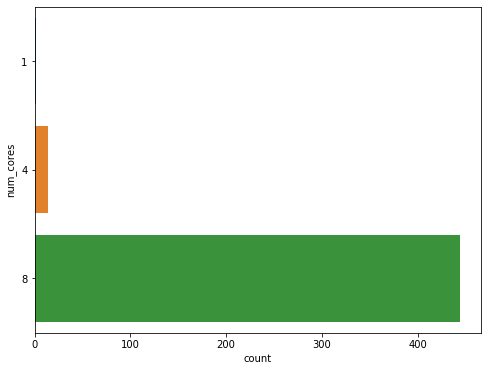

In [75]:
my_col = ['mobile_name','mobile_color','os','num_cores']
for i in my_col:
    plt.figure(figsize = (8,6))
    sns.countplot(y = df[i])

##### Lets check skewness of mobile price

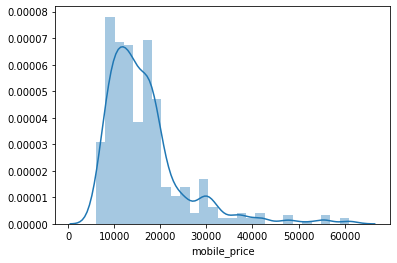

In [76]:
sns.distplot(df['mobile_price'])

In [77]:
print('skewness:- ',df['mobile_price'].skew())
print('kurtosis:- ',df['mobile_price'].kurt())

skewness:-  2.1329993750949363
kurtosis:-  6.101636047679868


In [78]:
pd.set_option('display.max_columns',None)
df.head()

,mobile_name,mobile_price,mobile_color,resolution,os,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size(cm),p_cam_max,p_cam_count,f_cam_max,f_cam_count,2G,3G,4G,4GVOLTE,5G
0,Realme,8999,White,1152000,10,8,2.0,32,3,5000,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0
1,Realme,8999,Blue,1152000,10,8,2.0,32,3,5000,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0
2,Realme,9999,Blue,1152000,10,8,2.0,64,4,5000,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0
3,Realme,9999,White,1152000,10,8,2.0,64,4,5000,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0
4,Realme,11999,Green,1152000,10,8,2.0,128,4,5000,75.4,164.4,9.00,199.0,16.51,48,4,48,4,1,1,1,1,0


In [79]:
ref_df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


### Data Preprocessing

In [80]:
df.isnull().sum()

mobile_name      0
mobile_price     0
mobile_color     0
resolution       0
os               0
num_cores        0
mp_speed         0
int_memory       0
ram              0
battery_power    0
mob_width        0
mob_height       0
mob_depth        0
mob_weight       0
disp_size(cm)    0
p_cam_max        0
p_cam_count      0
f_cam_max        0
f_cam_count      0
2G               0
3G               0
4G               0
4GVOLTE          0
5G               0
dtype: int64

##### Encoding

In [81]:
df.dtypes

mobile_name       object
mobile_price       int64
mobile_color      object
resolution         int32
os                 int32
num_cores          int64
mp_speed         float64
int_memory         int64
ram                int64
battery_power      int32
mob_width        float64
mob_height       float64
mob_depth        float64
mob_weight       float64
disp_size(cm)    float64
p_cam_max          int32
p_cam_count        int64
f_cam_max          int32
f_cam_count        int64
2G                 int32
3G                 int32
4G                 int32
4GVOLTE            int32
5G                 int32
dtype: object

In [82]:
data_ohe = pd.get_dummies(df[['mobile_name','mobile_color']])
data_ohe.head()

,mobile_name_Infinix,mobile_name_Mi,mobile_name_OPPO,mobile_name_POCO,mobile_name_Realme,mobile_name_Redmi,mobile_name_Samsung,mobile_name_Vivo,mobile_color_Black,mobile_color_Blue,mobile_color_Brick,mobile_color_Brown,mobile_color_Champagne,mobile_color_Concrete,mobile_color_Cyan,mobile_color_Edition,mobile_color_Gold,mobile_color_Green,mobile_color_Grey,mobile_color_Mint,mobile_color_Mist,mobile_color_Orange,mobile_color_Purple,mobile_color_Red,mobile_color_Ruby,mobile_color_Sapphire,mobile_color_Sea,mobile_color_Silver,mobile_color_Violet,mobile_color_Wave,mobile_color_White
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
data_ohe.shape

(459, 31)

In [84]:
df.shape

(459, 24)

In [85]:
df = pd.concat([df,data_ohe],axis = 1)
df.head()

,mobile_name,mobile_price,mobile_color,resolution,os,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size(cm),p_cam_max,p_cam_count,f_cam_max,f_cam_count,2G,3G,4G,4GVOLTE,5G,mobile_name_Infinix,mobile_name_Mi,mobile_name_OPPO,mobile_name_POCO,mobile_name_Realme,mobile_name_Redmi,mobile_name_Samsung,mobile_name_Vivo,mobile_color_Black,mobile_color_Blue,mobile_color_Brick,mobile_color_Brown,mobile_color_Champagne,mobile_color_Concrete,mobile_color_Cyan,mobile_color_Edition,mobile_color_Gold,mobile_color_Green,mobile_color_Grey,mobile_color_Mint,mobile_color_Mist,mobile_color_Orange,mobile_color_Purple,mobile_color_Red,mobile_color_Ruby,mobile_color_Sapphire,mobile_color_Sea,mobile_color_Silver,mobile_color_Violet,mobile_color_Wave,mobile_color_White
0,Realme,8999,White,1152000,10,8,2.0,32,3,5000,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Realme,8999,Blue,1152000,10,8,2.0,32,3,5000,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Realme,9999,Blue,1152000,10,8,2.0,64,4,5000,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Realme,9999,White,1152000,10,8,2.0,64,4,5000,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Realme,11999,Green,1152000,10,8,2.0,128,4,5000,75.4,164.4,9.00,199.0,16.51,48,4,48,4,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
df.drop(['mobile_name','mobile_color'],axis =1,inplace = True)

In [87]:
df.shape

(459, 53)

##### Xand y

In [88]:
X = df.drop('mobile_price',1)
y = df['mobile_price']

In [89]:
X.head()

,resolution,os,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size(cm),p_cam_max,p_cam_count,f_cam_max,f_cam_count,2G,3G,4G,4GVOLTE,5G,mobile_name_Infinix,mobile_name_Mi,mobile_name_OPPO,mobile_name_POCO,mobile_name_Realme,mobile_name_Redmi,mobile_name_Samsung,mobile_name_Vivo,mobile_color_Black,mobile_color_Blue,mobile_color_Brick,mobile_color_Brown,mobile_color_Champagne,mobile_color_Concrete,mobile_color_Cyan,mobile_color_Edition,mobile_color_Gold,mobile_color_Green,mobile_color_Grey,mobile_color_Mint,mobile_color_Mist,mobile_color_Orange,mobile_color_Purple,mobile_color_Red,mobile_color_Ruby,mobile_color_Sapphire,mobile_color_Sea,mobile_color_Silver,mobile_color_Violet,mobile_color_Wave,mobile_color_White
0,1152000,10,8,2.0,32,3,5000,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1152000,10,8,2.0,32,3,5000,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1152000,10,8,2.0,64,4,5000,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1152000,10,8,2.0,64,4,5000,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1152000,10,8,2.0,128,4,5000,75.4,164.4,9.00,199.0,16.51,48,4,48,4,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
y.head()

0     8999
1     8999
2     9999
3     9999
4    11999
Name: mobile_price, dtype: int64

##### Feature Scaling

In [91]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [92]:
X[['resolution','battery_power']] = rs.fit_transform(X[['resolution','battery_power']])
X.head()

,resolution,os,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight,disp_size(cm),p_cam_max,p_cam_count,f_cam_max,f_cam_count,2G,3G,4G,4GVOLTE,5G,mobile_name_Infinix,mobile_name_Mi,mobile_name_OPPO,mobile_name_POCO,mobile_name_Realme,mobile_name_Redmi,mobile_name_Samsung,mobile_name_Vivo,mobile_color_Black,mobile_color_Blue,mobile_color_Brick,mobile_color_Brown,mobile_color_Champagne,mobile_color_Concrete,mobile_color_Cyan,mobile_color_Edition,mobile_color_Gold,mobile_color_Green,mobile_color_Grey,mobile_color_Mint,mobile_color_Mist,mobile_color_Orange,mobile_color_Purple,mobile_color_Red,mobile_color_Ruby,mobile_color_Sapphire,mobile_color_Sea,mobile_color_Silver,mobile_color_Violet,mobile_color_Wave,mobile_color_White
0,-0.824121,10,8,2.0,32,3,1.94,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.824121,10,8,2.0,32,3,1.94,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.824121,10,8,2.0,64,4,1.94,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.824121,10,8,2.0,64,4,1.94,75.0,164.4,8.95,195.0,16.56,12,3,12,3,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.824121,10,8,2.0,128,4,1.94,75.4,164.4,9.00,199.0,16.51,48,4,48,4,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Train_test_split

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 101)

In [94]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(367, 52)
(92, 52)
(367,)
(92,)


### Linear Regression Model

In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
lr.score(X_train,y_train)

0.8479063690817094

### Prediction and Evaluation

In [98]:
y_pred = lr.predict(X_test)

In [99]:
from sklearn.metrics import r2_score

In [100]:
r2_score(y_pred,y_test)

0.8265024795463111

##### Our model bias and variance is normal so we can conclude our ML model for predicting price is good